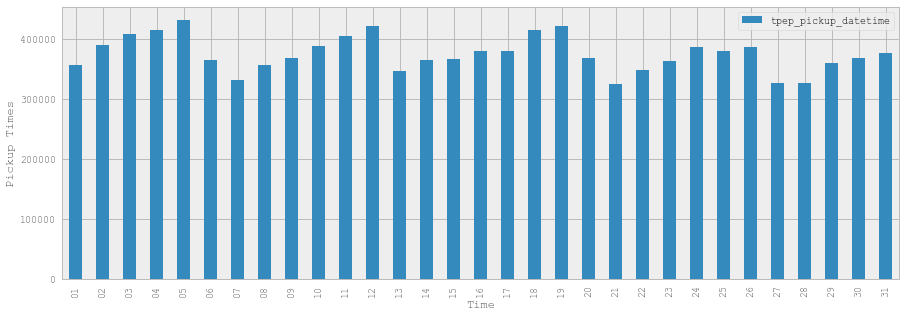

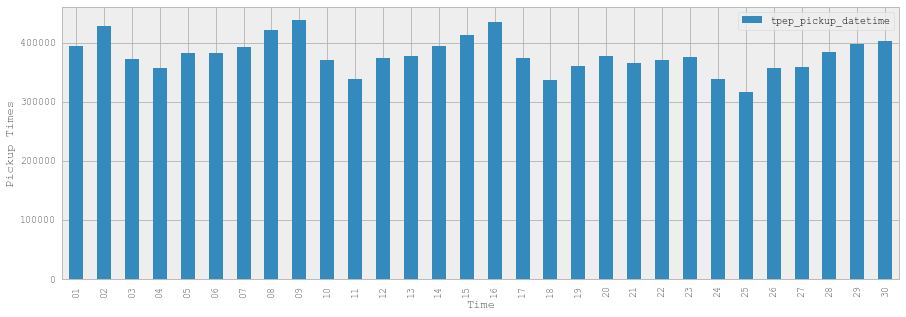

In [10]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

filename = r'train.csv'
if os.path.exists(filename):
    os.remove(filename)

month = ['03', '04']
flag = True
for i in month:
    weather = pd.read_csv(r'D:/Application/eclipse/workspace/COMSE6998PROJECT/WeatherCrawler/weather_processed/weather_2016_%s.csv'%i,index_col='Time')
    taxi = pd.read_csv(r'D:/Application/eclipse/workspace/COMSE6998PROJECT//PreProcessTaxiData/cleanData_yellow_tripdata_2016-%s.csv'%i)
    del taxi['Unnamed: 0']
    Time=taxi['tpep_pickup_datetime'].copy().str.slice(8,16)
    taxi['tpep_pickup_datetime']=Time.str.slice_replace(6,8,'51')
    # column name外面最好加中括号
    taxiDate = taxi[['tpep_pickup_datetime']].copy()
    countPickup = taxiDate['tpep_pickup_datetime'].value_counts()
    countPickup = countPickup.sort_index().to_frame()
    countPickup.index.names=['Time']
    dayPickup = countPickup.groupby(countPickup.index.str.slice(0,2)).aggregate(sum)
    dayPickup.plot(kind='bar')
    plt.ylabel('Pickup Times')
    train = weather.join(countPickup[['tpep_pickup_datetime']])
    train.index = train.index.str.slice(3,5)
    train = train.fillna(method = 'ffill')
    train['Wind'] = train['Wind'].replace('No wind', 0)
    train['Wind'].unique()
    # 只需要一个header
    if flag:
        train.to_csv('train.csv', mode='a',header=True)
        flag = False
        continue
    train.to_csv('train.csv', mode='a',header=False)